## ngrams and topic formation

In [1]:
#!pip install -r script/requirements.txt --user

### Setup

In [2]:
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.plotting import figure, output_file, show
from collections import Counter
from functools import reduce
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from IPython.core.interactiveshell import InteractiveShell
from nltk.corpus import stopwords
from plotly.offline import iplot
from pprint import pprint
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from textblob import TextBlob
import collections
import csv
import cufflinks
import emoji
import en_core_web_sm
import gensim
import gensim.corpora as corpora
import itertools
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import pyLDAvis
import re
import scattertext as st
import seaborn as sns
import spacy
import spacy
import warnings 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

C:\Users\Swazy\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Swazy\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [3]:
get_ipython().run_line_magic('matplotlib', 'inline')
InteractiveShell.ast_node_interactivity = 'all'
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

output_notebook()
pd.options.display.max_columns = 30
warnings.filterwarnings('ignore')

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

nlp = spacy.load('en_core_web_sm')

C:\Users\Swazy\anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



Loading BokehJS ...

C:\Users\Swazy\anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



In [4]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Swazy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
words = set(nltk.corpus.words.words())

### Load File

In [6]:
filename: str = "./../artifacts/ifa-ie-articles.csv"
#df = pd.read_csv("./../artifacts/ifa-ie-beef-articles-clean.csv")
df = pd.read_csv(filename)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              872 non-null    object 
 1   Heading          872 non-null    object 
 2   Date             872 non-null    object 
 3   Trend            872 non-null    object 
 4   Text             872 non-null    object 
 5   HTML Content     872 non-null    object 
 6   clean_text       872 non-null    object 
 7   polarity_tokens  872 non-null    float64
 8   review_len       872 non-null    int64  
 9   word_count       872 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 68.2+ KB


In [8]:
df['Text'][df['Trend'] == 'cattle'].iloc[0]

'\r\nPrices reported as quoted or paid to IFA Members.\r\nStrong Demand. Prices rising. Factories paying above quotes. Steer base €4.30/4.40/kg. Heifer base €4.35/4.45/kg. Higher deals for larger and specalised lots. Young Bulls R/U €4.25/4.40/kg. Cows €3.60/€4.10/kg. In-spec bonus 20c/kg for under 30 months and 8c/kg for 30 to 36 months. 12c/kg bonus for under 30 month steers and heifers grading O- and those with a fat class of 4+ that meet all other in spec criteria.\r\nFACTORY BASE QUOTES C/KG\r\n\r\n\xa0SteersHeifersCowsDawn Slane430435350-400Kepak Athleague430435350-400Moyvalley Meats425/430430/435360-390Euro Farm Foods430435350-400ABP Clones430435350-400Liffey Meats430435350-400Slaney Foods430435350-410Kepak Kilbeggan430435350-400Dawn Ballyhaunis\xa0\xa0430435350-410Foyle Meats\xa0*incl 10c 300 – 400kg\xa0\xa0440*\xa0445*\xa0350-395*Ashbourne Meats430435350-410Meadowmeats Rathdowney430435350-390Charleville Foods430435350-390Kepak Watergrasshill430435350-390ABP Bandon430435350-390

In [9]:
df['Text'][df['Trend'] == 'dairy'].iloc[0]

'\r\n\r\n\r\nClick on the link below to join the IFA Dairy Calf Webinar at 8pm this evening, Wednesday 26th January.\r\nJoin the Meeting\r\n\r\n\r\nAs the calving season gets underway, IFA will host a Dairy Calf webinar on Wednesday, Jan 26th at 8pm.\r\nIFA Dairy Chairman Stephen Arthur said top-quality management of calves, particularly in their first four to six weeks, is essential to support a dairy sector that is both profitable and sustainable.\r\n“The webinar will inform farmers on how to use the latest technologies to improve the quality and value of calves born from the dairy herd and will also examine the viability of dairy calf to beef systems,” he said.\r\nThe speakers will include Rob Doyle from the Dept of Agriculture; Stephen Butler from Teagasc; Sean Coughlan from ICBF and Nicky Byrne from Teagasc.\r\nAttendees will be updated on the latest developments arising from the EU Committee of Inquiry on the Protection of Animals during Transport (ANIT Committee) which, if imple

### Graph

In [10]:
df['polarity_tokens'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity_tokens',
    linecolor='black',
    yTitle='count',
    title='Token Polarity Distribution')

In [11]:
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [12]:
#df['clean_text']= df['clean_text'].values.astype('U')

In [13]:
#df3.to_csv('df3.csv', index = False)

KeyError: 'sentiment'

In [15]:
# function to prepare n-grams
def count_ngrams(lines, min_length=2, max_length=4):
    lengths = range(min_length, max_length+1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen = max_length)
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current)>= length:
                ngrams[length][current[:length]] +=1
    for line in lines:
        for word in nltk.word_tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

In [16]:
def print_most_freq_ng(ngrams, num=10):
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [17]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----10 most frequent 2-grams ----
milk price: 509
price report: 348
ifa president: 332
brendan golden: 316
livestock chairman: 309
ifa national: 306
steer heifer: 296
young bull: 285
joe healy: 283
beef price: 269

----10 most frequent 3-grams ----
brendan golden say: 252
angus wood say: 203
joe healy say: 194
young bull cow: 185
cow spec bonus: 157
report dafm week: 156
bull cow spec: 155
insist payment day: 152
ifa national livestock: 150
livestock chairman brendan: 149

----10 most frequent 4-grams ----
bull cow spec bonus: 153
young bull cow spec: 152
insist payment day cattle: 148
livestock chairman brendan golden: 148
quote pay ifa member: 146
farmer insist payment day: 143
ifa national livestock chairman: 141
price report quote pay: 139
ifa president joe healy: 139
report quote pay ifa: 137



In [18]:
bigramtodf = pd.DataFrame({'2-grams': [], '2-grams freq': []})
trigramtodf = pd.DataFrame({'3-grams': [], '3-grams freq': []})
quadgramtodf = pd.DataFrame({'4-grams': [], '4-grams freq': []})

In [19]:
def print_most_freq_ng(ngrams, num=2222):
    global bigramtodf, trigramtodf, quadgramtodf
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
            if n == 2:
                bigramtodf = bigramtodf.append({'2-grams': gram, '2-grams freq': count}, ignore_index=True)
            elif n == 3:
                trigramtodf = trigramtodf.append({'3-grams': gram, '3-grams freq': count}, ignore_index=True)
            else:
                quadgramtodf = quadgramtodf.append({'4-grams': gram, '4-grams freq': count}, ignore_index=True)
        print('')

In [20]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----2222 most frequent 2-grams ----
milk price: 509
price report: 348
ifa president: 332
brendan golden: 316
livestock chairman: 309
ifa national: 306
steer heifer: 296
young bull: 285
joe healy: 283
beef price: 269
angus wood: 264
say ifa: 260
golden say: 252
steer base: 228
bull cow: 226
bonus month: 215
healy say: 211
cattle price: 206
ifa livestock: 203
wood say: 203
spec bonus: 189
beef farmer: 186
bord bia: 184
tim cullinan: 179
national livestock: 173
tom phelan: 168
base price: 165
minister creed: 164
live export: 161
food kepak: 160
cow spec: 159
report dafm: 158
dafm week: 156
ifa member: 153
insist payment: 153
irish price: 153
pay ifa: 152
payment day: 152
department agriculture: 152
quote pay: 150
day cattle: 150
chairman brendan: 150
price increase: 150
factory base: 149
base quote: 148
say farmer: 146
farmer insist: 144
phelan say: 143
report quote: 141
high deal: 141
national dairy: 139
president joe: 139
cullinan say: 135
chairman tom: 132
price update: 122
president t

increase beef: 20
end june: 20
meat industry: 20
heifers bulls: 20
say time: 20
brexit fund: 20
heifers bull: 20
today ifa: 20
include vat: 20
oil price: 20
farm ballyhaunis: 19
lamb high: 19
composite price: 19
farm meat: 19
say supply: 19
farmer beef: 19
food supply: 19
return farmer: 19
cow calf: 19
quote price: 19
take place: 19
price quote: 19
fail meet: 19
figure animal: 19
animal number: 19
euro change: 19
cow total: 19
cow cow: 19
agriculture commissioner: 19
meat plant: 19
aid package: 19
thomas cooney: 19
lairage operator: 19
pay milk: 19
butter cheese: 19
ahdb overall: 18
overall seasonchange: 18
ifa work: 18
farmer continue: 18
irish farm: 18
bull price: 18
deal available: 18
country say: 18
member price: 18
provide farmer: 18
new cap: 18
farm family: 18
pay price: 18
number week: 18
favourable market: 18
meeting ifa: 18
quality assurance: 18
task force: 18
industry ireland: 18
price level: 18
base young: 18
price irish: 18
figure number: 18
select sell: 18
sell advice: 18


say cow: 10
price lag: 10
welfare scheme: 10
price past: 10
market supply: 10
price justify: 10
long way: 10
cull cow: 10
increase production: 10
factory struggle: 10
secure supply: 10
market environment: 10
demand sell: 10
attempt factory: 10
need say: 10
week beef: 10
strong steady: 10
sustainable beef: 10
ireland say: 10
value beef: 10
quality beef: 10
year compare: 10
committee meet: 10
irish suckler: 10
market ifa: 10
increase number: 10
unacceptable say: 10
tight demand: 10
demand number: 10
rise steer: 10
scheme apply: 10
matter urgency: 10
urge farmer: 10
allow farmer: 10
sheep lamb: 10
closure food: 10
golden encourage: 10
strong support: 10
beef supermarket: 10
meet senior: 10
price late: 10
low price: 10
farmer help: 10
heifers deal: 10
price time: 10
food sector: 10
golden call: 10
fund say: 10
clear farmer: 10
female replacement: 10
number total: 10
import tariff: 10
secure deal: 10
agriculture committee: 10
grass base: 10
commission need: 10
call factory: 10
dafm average:

improve market: 8
price august: 8
member op: 8
purchase op: 8
op follow: 8
table show: 8
current milk: 8
spring milk: 8
early january: 8
crude oil: 8
op milk: 8
glanbia kerry: 8
supply growth: 8
low volume: 8
global economic: 8
price decision: 8
journal milk: 8
op include: 8
smp stock: 8
rabobank predict: 8
labour permit: 8
sell intervention: 8
factory anxious: 7
meat china: 7
say change: 7
irish export: 7
ewe sell: 7
standard ifa: 7
say recommendation: 7
potential impact: 7
welfare standard: 7
say critical: 7
irish economy: 7
massive increase: 7
deliver farmer: 7
price see: 7
reduce volume: 7
lot weight: 7
move lamb: 7
unjustified price: 7
representative body: 7
place say: 7
service farmer: 7
gap prime: 7
supply prime: 7
suitable cattle: 7
depend grade: 7
follow ifa: 7
provide additional: 7
additional funding: 7
supply meet: 7
tight strong: 7
say welcome: 7
bovine project: 7
farmer come: 7
status irish: 7
cap policy: 7
week base: 7
factory come: 7
supply suitable: 7
farmer dig: 7
farm

action need: 6
heifer deal: 6
farmer current: 6
farmer concerned: 6
source ahdb: 6
develop suckler: 6
include young: 6
european country: 6
equivalent price: 6
tighten come: 6
trade price: 6
late figure: 6
farmer payment: 6
minister ensure: 6
government introduce: 6
pay week: 6
october lamb: 6
farmer able: 6
price cattle: 6
year low: 6
animal herd: 6
service provider: 6
payment issue: 6
feed pgi: 6
essential service: 6
quality product: 6
action plan: 6
need ensure: 6
october say: 6
department confirm: 6
mercosur agreement: 6
opposition deal: 6
report state: 6
ifa rural: 6
development chairman: 6
tranche close: 6
investment scheme: 6
additional cost: 6
factory retailer: 6
stay safe: 6
physical distancing: 6
wear mask: 6
week equivalent: 6
commission young: 6
average ireland: 6
step step: 6
say fact: 6
animal include: 6
payment ifa: 6
ireland cow: 6
compare week: 6
cover loss: 6
national liquid: 6
fair price: 6
heifer live: 6
dara calleary: 6
new scheme: 6
farmer spring: 6
consumer price:

week animalfigurechangeytdytd changelamb: 28
chilling dawn ballyhaunis: 28
prev official price: 27
animalfigurechangeytdytd changelamb spring: 27
update ifa livestock: 26
bord bia sheep: 26
ifa sheep chairman: 26
say brendan golden: 26
irish beef farmer: 26
increase breed bonus: 26
agriculture minister michael: 26
say joe healy: 26
base heifer high: 25
large lot bulls: 25
lot bulls cow: 25
country steer live: 25
steer live export: 25
seasonchange price incl: 25
prev prev prev: 25
strong factory demand: 25
stephen arthur say: 25
ornua value payment: 25
golden say farmer: 24
price continue rise: 24
changelamb spring light: 24
lot increase breed: 24
source european commission: 24
specalise lot young: 23
update ifa sheep: 23
bord bia price: 23
cattle ifa livestock: 23
european commission live: 23
cattle ifa national: 23
tom phelan today: 23
irish milk price: 23
pay quote steer: 22
quote steer base: 22
say price report: 22
say farmer sell: 22
base price steer: 22
specalise lot increase: 22


base heifers deal: 9
suckler farmer say: 9
close possible trading: 9
possible trading relationship: 9
food safety animal: 9
price animal euro: 9
animal euro change: 9
euro change prev: 9
source dafm average: 9
brexit beef price: 9
tim cullinan welcome: 9
foyle meat include: 9
meat include ashbourne: 9
include ashbourne meat: 9
price incl vat: 9
incl vat heifers: 9
official cattle price: 9
ahbd report cattle: 9
report cattle price: 9
price week end: 9
italy poland steer: 9
poland steer price: 9
bord bia beef: 9
grass fed standard: 9
steer price equivalent: 9
price equivalent incl: 9
dawn ballyhauni ashbourne: 9
ballyhauni ashbourne meat: 9
low cost loan: 9
joe healy call: 9
grocery code adjudicator: 9
ifa environment chairman: 9
wood say minister: 9
support direct aid: 9
direct aid farmer: 9
agriculture commissioner phil: 9
sector angus wood: 9
price vat incl: 9
adjust include ornua: 9
milk price reflect: 9
milk price market: 9
return milk price: 9
milk price fall: 9
milk price conclude

strong demand ewe: 6
demand ewe supply: 6
market condition irish: 6
quality grade cow: 6
export market say: 6
base price heifer: 6
beef sector ifa: 6
low quote price: 6
mart avg official: 6
demand remain strong: 6
reflect market condition: 6
bull cow supply: 6
steer heifers young: 6
support brexit adjustment: 6
tariff free quota: 6
report official price: 6
official price animalgbp: 6
supply figure numberschange: 6
meet female replacement: 6
meeting department agriculture: 6
include young bull: 6
tighten come week: 6
week cattle price: 6
bull cow week: 6
closing date september: 6
update october lamb: 6
grass feed pgi: 6
basic payment scheme: 6
significant price increase: 6
ifa rural development: 6
rural development chairman: 6
wear mask mart: 6
average steer price: 6
commission young bulls: 6
vat average ireland: 6
step step guide: 6
official price irish: 6
price irish steer: 6
price ireland cow: 6
ireland cow price: 6
national liquid milk: 6
heifer live export: 6
farmer work clock: 6
i

ifa call minister: 5
suspend non beef: 5
price farm income: 5
direct payment aid: 5
competition additional market: 5
additional market outlet: 5
increase recent week: 5
meet senior official: 5
senior official department: 5
cow suckler ifa: 5
suckler cow farmer: 5
global dairy market: 5
beef market turmoil: 5
say ifa detailed: 5
need help say: 5
food chain work: 5
phelan today tuesday: 5
income crisis farm: 5
farmer beef sector: 5
bring great transparency: 5
south tipperary ifa: 5
calf bear dairy: 5
joe healy accuse: 5
price setting friday: 5
week joe healy: 5
new beef price: 5
healy say factory: 5
say factory need: 5
beef environmental efficiency: 5
environmental efficiency pilot: 5
extend closing date: 5
liffey meat dawn: 5
meat dawn ballyhaunis: 5
competition consumer protection: 5
consumer protection commission: 5
code adjudicator christine: 5
adjudicator christine tacon: 5
say ifa brussels: 5
ifa brussels director: 5
brussels director liam: 5
director liam machale: 5
week angus woo

agriculture irish farmer: 4
sector ifa president: 4
way support farmer: 4
affect russian embargo: 4
import tariff lead: 4
irish price animal: 4
lamb fit ifa: 4
farmer expect government: 4
morning ifa president: 4
new measure introduce: 4
say irish dairy: 4
low emission slurry: 4
emission slurry spread: 4
slurry spread equipment: 4
sale protect urea: 4
protect urea increase: 4
urea increase year: 4
water quality improvement: 4
meeting ifa president: 4
supply spec cattle: 4
cow price increase: 4
price comment ifa: 4
supply figure november: 4
figure november november: 4
price animaleuro kgchange: 4
animaleuro kgchange previous: 4
application pgi status: 4
young bull meet: 4
meet grass feed: 4
grass feed criterion: 4
quality irish beef: 4
ifa campaign brussel: 4
campaign brussel ensure: 4
brussel ensure fund: 4
ensure fund place: 4
fund place irish: 4
place irish government: 4
government ensure manoeuvre: 4
ensure manoeuvre country: 4
golden call minister: 4
rise week say: 4
payment beef f

increase payment rate: 4
farmer beef enterprise: 4
beef enterprise partnership: 4
angus wood welcome: 4
severe income crisis: 4
department agriculture commission: 4
finished animal suckler: 4
animal suckler cow: 4
cow angus wood: 4
beef price brexit: 4
size football pitch: 4
wood say clear: 4
aid package beef: 4
team leader john: 4
leader john coughlan: 4
john coughlan say: 4
coughlan say compound: 4
say compound feed: 4
compound feed price: 4
significant reduction cereal: 4
healy say brexit: 4
qps quality payment: 4
quality payment system: 4
scheme angus wood: 4
beef processing sector: 4
dairy beef farmer: 4
model food production: 4
highlight brazilian competent: 4
sector joe healy: 4
proposal minister creed: 4
farmer difficult time: 4
place angus wood: 4
factory feedlot factory: 4
feedlot factory own: 4
farmer finish cattle: 4
pay beef farmer: 4
cattle steer heifer: 4
autumn suckler farmer: 4
send strong message: 4
healy say clear: 4
irish european farmer: 4
food safety environment: 

report dafm week animalfigurechangeytdytd: 28
dafm week animalfigurechangeytdytd changelamb: 28
kildare chilling dawn ballyhaunis: 28
lot young bull cow: 27
prev official price report: 27
live export source bord: 27
week animalfigurechangeytdytd changelamb spring: 27
beef update ifa livestock: 26
update steer base heifer: 26
source bord bia sheep: 26
agriculture minister michael creed: 26
update ifa livestock chairman: 25
steer base heifer high: 25
base heifer high deal: 25
deal large lot bulls: 25
large lot bulls cow: 25
vat country steer live: 25
country steer live export: 25
say ifa national livestock: 25
brendan golden say farmer: 24
animalfigurechangeytdytd changelamb spring light: 24
changelamb spring light official: 24
lot increase breed bonus: 24
large specalise lot young: 23
specalise lot young bull: 23
sheep update ifa sheep: 23
cattle ifa livestock chairman: 23
source european commission live: 23
day cattle ifa national: 23
chairman tom phelan today: 23
pay quote steer base:

say agriculture minister michael: 9
angus wood say minister: 9
support direct aid farmer: 9
agriculture commissioner phil hogan: 9
sector angus wood say: 9
adjust include ornua value: 9
conclude ifa president tim: 9
tom phelan say farmer: 9
equivalent vat incl vat: 9
deduction nominal processing cost: 9
hold march milk price: 9
dafm week animalfigurechangeytd lambs: 8
week animalfigurechangeytd lambs spring: 8
demand factory pay quote: 8
live sheep export source: 8
sheep export source bord: 8
bully bullcowp price incl: 8
bullcowp price incl euro: 8
price incl euro price: 8
seasonchange price incl total: 8
price incl total live: 8
incl total live sheep: 8
demand steer base heifer: 8
steerssteersheifersheifersy bully bullcowp euro: 8
bully bullcowp euro price: 8
bullcowp euro price recent: 8
price brendan golden say: 8
incl change prev prev: 8
source bordbia sheep update: 8
report dafm week prev: 8
group large lot strong: 8
large lot strong demand: 8
steersheiferscowsdawn farm ballyhauni

week official price report: 5
beef brendan golden say: 5
cattle tight week kill: 5
say minister agriculture charlie: 5
incl prev prev yrnational: 5
pay ifa member factory: 5
high deal available group: 5
brendan golden say late: 5
cattle rear finish farmer: 5
convergence criss eco scheme: 5
bully bullcowp price euro: 5
bullcowp price euro price: 5
price euro price recent: 5
price update lamb weight: 5
lamb weight high deal: 5
farmer ifa livestock chairman: 5
factory pay base price: 5
group large lot good: 5
large lot good demand: 5
lot good demand sell: 5
lamb fit lamb price: 5
ahdb seasonchange price source: 5
seasonchange price source bord: 5
price source bord bia: 5
price strengthen past week: 5
dafm week prev prev: 5
golden say farmer sell: 5
price steer base heifer: 5
apply new reference period: 5
ifa national sheep committee: 5
national sheep committee chairman: 5
dennehy say hogget make: 5
price update hogget spring: 5
update hogget spring lamb: 5
payment day cattle steer: 5
dema

support suckler farmer say: 4
set key measure need: 4
key measure need safeguard: 4
measure need safeguard irish: 4
need safeguard irish european: 4
safeguard irish european agriculture: 4
maintain close possible trading: 4
possible trading relationship single: 4
trading relationship single market: 4
relationship single market essential: 4
single market essential maintain: 4
market essential maintain level: 4
essential maintain level playing: 4
maintain level playing field: 4
level playing field correspond: 4
playing field correspond standard: 4
field correspond standard food: 4
correspond standard food safety: 4
standard food safety animal: 4
delay control good sanitary: 4
control good sanitary phytosanitary: 4
good sanitary phytosanitary inspection: 4
sanitary phytosanitary inspection veterinary: 4
phytosanitary inspection veterinary certificate: 4
inspection veterinary certificate lead: 4
veterinary certificate lead delay: 4
certificate lead delay border: 4
lead delay border increas

tacon grocery code adjudicator: 4
grocery code adjudicator oversee: 4
code adjudicator oversee implementation: 4
adjudicator oversee implementation grocery: 4
oversee implementation grocery supply: 4
implementation grocery supply code: 4
grocery supply code practice: 4
supply code practice designate: 4
code practice designate retailer: 4
practice designate retailer direct: 4
designate retailer direct supplier: 4
retailer direct supplier say: 4
direct supplier say opportunity: 4
supplier say opportunity hear: 4
say opportunity hear hand: 4
opportunity hear hand account: 4
hear hand account establish: 4
hand account establish regulator: 4
account establish regulator operate: 4
establish regulator operate retailer: 4
regulator operate retailer supplier: 4
operate retailer supplier ensure: 4
retailer supplier ensure play: 4
supplier ensure play pitch: 4
ensure play pitch say: 4
play pitch say ifa: 4
pitch say ifa brussels: 4
say ifa brussels director: 4
director liam machale update: 4
liam

pay quote demand strong: 3
quote demand strong steer: 3
brendan golden say demand: 3
maximise return farmer favourable: 3
return farmer favourable market: 3
farmer favourable market condition: 3
sean dennehy say supply: 3
say farmer sell lamb: 3
price factory pay quote: 3
chinese market irish beef: 3
market irish beef month: 3
golden say farmer ignore: 3
brendan golden say attempt: 3
market ifa livestock chairman: 3
say late prime irish: 3
late prime irish composite: 3
price export benchmark price: 3
report dafm week animalnumberchangeprev: 3
ensure glut lamb come: 3
positive market condition prevail: 3
dafm week incl yrnational: 3
week incl yrnational avg: 3
incl yrnational avg official: 3
large lot say cull: 3
market condition beef favourable: 3
condition beef favourable remainder: 3
beef favourable remainder year: 3
favourable remainder year market: 3
remainder year market buy: 3
year market buy pattern: 3
finished cattle tight rest: 3
cattle tight rest year: 3
tight rest year numbe

change agricultural practice new: 3
agricultural practice new measure: 3
practice new measure introduce: 3
new measure introduce jan: 3
say irish dairy farmer: 3
irish dairy farmer invest: 3
dairy farmer invest low: 3
farmer invest low emission: 3
invest low emission slurry: 3
slurry spread equipment yield: 3
spread equipment yield positive: 3
equipment yield positive result: 3
yield positive result water: 3
positive result water quality: 3
result water quality sale: 3
water quality sale protect: 3
quality sale protect urea: 3
inevitable lag time implementation: 3
lag time implementation improve: 3
time implementation improve management: 3
implementation improve management practice: 3
improve management practice water: 3
management practice water quality: 3
practice water quality response: 3
water quality response mean: 3
quality response mean water: 3
response mean water quality: 3
mean water quality improvement: 3
water quality improvement definitive: 3
quality improvement definitive

In [21]:
bigramtodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2-grams       2222 non-null   object 
 1   2-grams freq  2222 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB


In [22]:
bigram_df = bigramtodf
fig = px.bar(
        bigram_df[:20],
        x='2-grams',
        y='2-grams freq',
        title="Counts of top bigrams",
        template="plotly_white",
        labels={"ngram": "Bigram", "count": "Count"},
    )
fig.update_layout(width=1200, height=500)
fig.show()

In [23]:
temp_df=bigram_df[:20]
temp_df.head(10)

,2-grams,2-grams freq
0,"(milk, price)",509.0
1,"(price, report)",348.0
2,"(ifa, president)",332.0
3,"(brendan, golden)",316.0
4,"(livestock, chairman)",309.0
5,"(ifa, national)",306.0
6,"(steer, heifer)",296.0
7,"(young, bull)",285.0
8,"(joe, healy)",283.0
9,"(beef, price)",269.0


In [45]:
reindexed_data = df[df.Trend=='cattle']['clean_text']
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [46]:
n_topics = 11
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [47]:
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [48]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [49]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        done = False
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
                done = True
        if done:
            temp_vector_sum = temp_vector_sum.toarray()
            top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
            top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [50]:
top_n_words_lsa = get_top_n_words(7, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  abp base quote month bonus spec meat
Topic 2:  say price beef farmer market week ifa
Topic 3:  heifers bulls deal cow steer strong market
Topic 4:  heifers bull steer cow unchanged price steady
Topic 5:  scheme suckler say farmer apply beep cow
Topic 6:  check table week base additional secure price
Topic 7:  deal say commission mercosur brexit healy brazil
Topic 8:  unchanged remain bull heifer steer cow price
Topic 9:  fight update price steer cow heifers heifer
Topic 10:  bovine project meeting stakeholder teagasc beef network


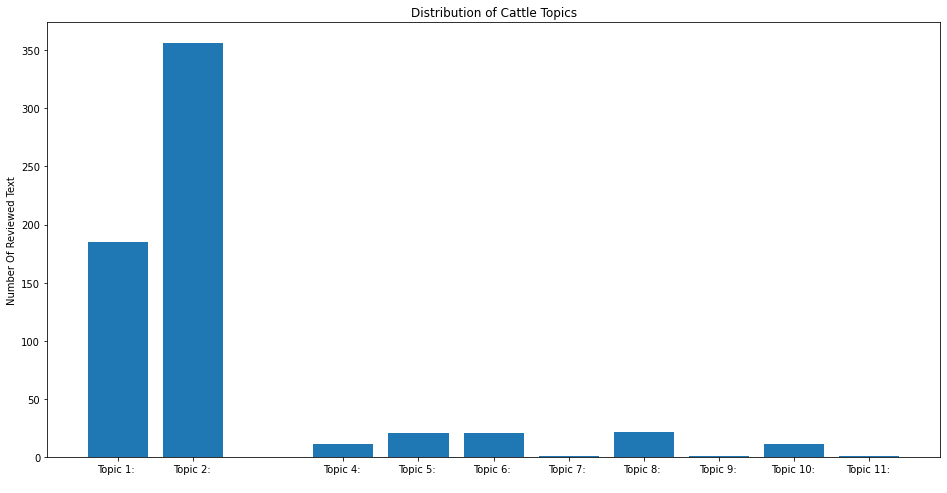

In [51]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i+1) for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number Of Reviewed Text');
ax.set_title('Distribution of Cattle Topics');
plt.show();

In [52]:
# vectorize text data
tfid_vec = TfidfVectorizer(tokenizer=lambda x: str(x).split())
X = tfid_vec.fit_transform(df['clean_text'])
X.shape

(872, 4785)

In [53]:
tsne = TSNE(n_components=2,
           perplexity=50,
           learning_rate=300,
           n_iter=800,
           verbose=1)
# tsne to our document vectors
componets = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 872 samples in 0.002s...
[t-SNE] Computed neighbors for 872 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 872 / 872
[t-SNE] Mean sigma: 0.372444
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.430817
[t-SNE] KL divergence after 800 iterations: 0.591853


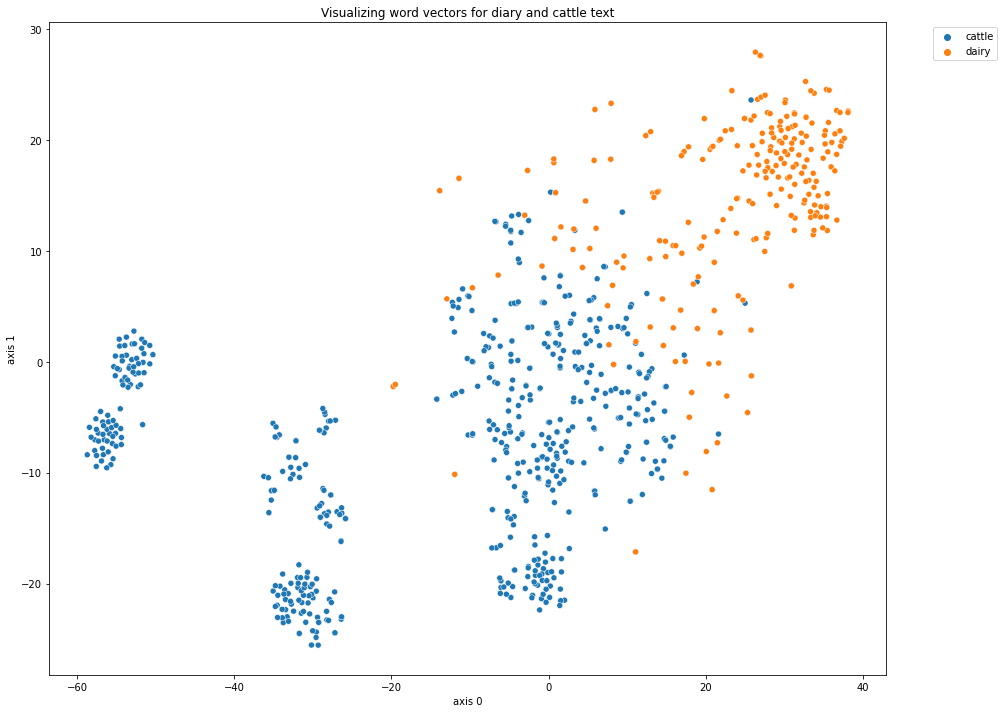

In [55]:
def plot_embeddings(embedding, title):
    fig = plt.figure(figsize=[15,12])
    ax = sns.scatterplot(embedding[:,0], embedding[:,1], hue=df['Trend'])
    plt.title(title)
    plt.xlabel('axis 0')
    plt.ylabel('axis 1')
    plt.legend(bbox_to_anchor=(1.05,1), loc=2)
    plt.show()
    return

plot_embeddings(componets, 'Visualizing word vectors for diary and cattle text')

